
# Titanic Logistic Regression

Using a classification model to predict whether someone survived the Titanic disaster. We are also interested in what features correlate with the target. This data came from Kaggle's website.

#### The Columns

*Embarked*: The port in which the person got on the Titanic

*Cabin*: The area of the boat in which someone slept

*Fare*: The cost of the ticket

*Ticket*: The ticket number

*Parch*: The number of Parents/Children on board

*SibSp*: Number of siblings / spouses aboard the Titanic

*Age*: Age in years

*Sex*: sex of the person

*Pclass*: 1,2,3 (ticket class)

*PassengerId*: starts at 1 but is just an index

*Survived*: The target column

### Analysis, Visualizations, and Preprocessing

In [508]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
import numpy as np

In [509]:
df = pd.read_csv('titanic.csv')

In [510]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It looks like we have missing data in Age, Embarked, and Cabin labels. Lets look at Age first.

Maybe we can use Fare to impute Age because it makes sense that younger people will have cheaper tickets

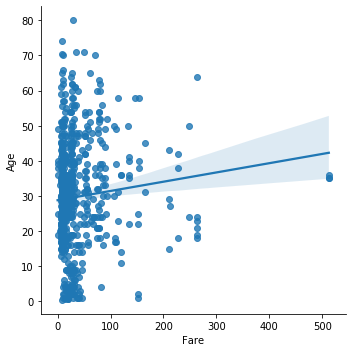

In [512]:
sns.lmplot(data=df, y="Age", x="Fare")

There isn't a good enough correlation so we can't use Fare to impute Age. 

Another option is to use the mean to fill in the missing values, however, after researching this we can actually use Pclass as a way to estimate age.

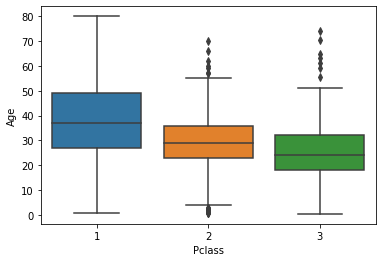

In [513]:
sns.boxplot(x='Pclass', y='Age', data=df)

We will use the mean age associated with each Pclass to fill in the missing values and keep as much data as possible

In [514]:
df[df['Pclass'] ==1]['Age'].mean() # Pclass 1

38.233440860215055

In [515]:
df[df['Pclass'] ==2]['Age'].mean() # Pclass of 2

29.87763005780347

In [516]:
df[df['Pclass'] ==3]['Age'].mean() # Pclass of 3

25.14061971830986

In [517]:
def imputeAge(x):
    age = x[0]
    pclass = x[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38.2
        elif pclass == 2:
            return 29.9
        else:
            return 25.1
    else:
        return age

df["Age"] = df[["Age", "Pclass"]].apply(imputeAge, axis=1)

Now that Age is sorted let's work on Cabin

In [518]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
F2             3
              ..
B102           1
A7             1
C95            1
C62 C64        1
A34            1
Name: Cabin, Length: 147, dtype: int64

We're going to replace the Cabin column with one that only hosts cabin letter. After this we will compare cabin letter with survival and see if this column is worth implementing in our model. If so, we will attempt to impute missing data to see if using this column in the model is possible (and we will do this if so).

In [519]:
def cabinLetter(x):
    if pd.isnull(x):
        pass
    else:
        return x[0]
    
df["Cabin"] = df["Cabin"].apply(cabinLetter)
        

In [520]:
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

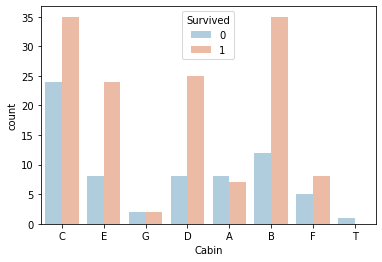

In [521]:
sns.countplot(x='Cabin',hue='Survived',data=df,palette='RdBu_r')

It looks like there could be some correlations here based on cabin because the distributions of 0/1's are not uniform

In [522]:
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

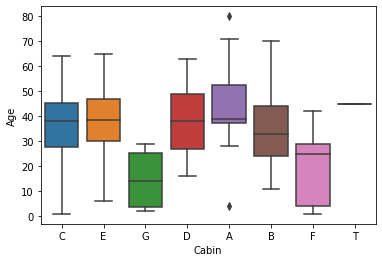

In [523]:
sns.boxplot(x='Cabin', y='Age', data=df)

Too many of these Cabins have a mean too close to one another. Cabins G, F, and T are exceptions but these cabin letters only represent 8.8% of the data. Maybe we can get better separation by looking at Fare?

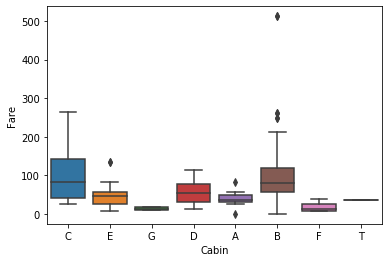

In [524]:
sns.boxplot(x='Cabin', y='Fare', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197BFF58E48>]],
      dtype=object)

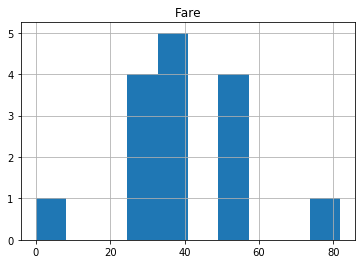

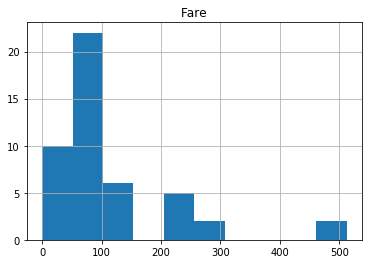

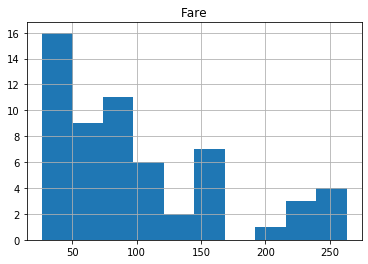

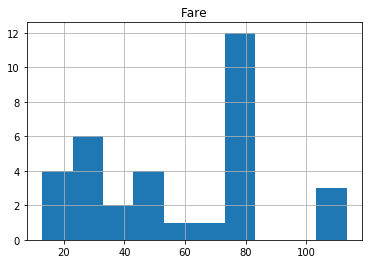

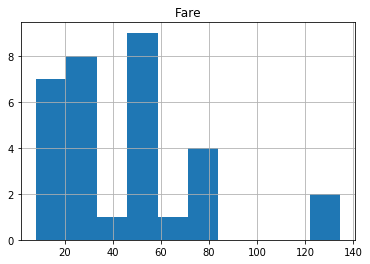

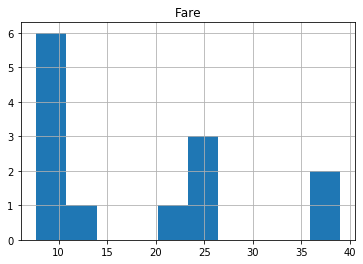

In [525]:
df[df["Cabin"]=="A"].hist(column="Fare")
df[df["Cabin"]=="B"].hist(column="Fare")
df[df["Cabin"]=="C"].hist(column="Fare")
df[df["Cabin"]=="D"].hist(column="Fare")
df[df["Cabin"]=="E"].hist(column="Fare")
df[df["Cabin"]=="F"].hist(column="Fare")

In [526]:
df[df['Cabin'] =="B"]['Fare'].mean() # B

113.50576382978724

In [527]:
df[df['Cabin'] =="C"]['Fare'].mean() # C

100.15134067796612

In [528]:
df[df['Cabin'] =="D"]['Fare'].mean() # D

57.24457575757576

In [529]:
df[df['Cabin'] =="E"]['Fare'].mean() # E

46.026693749999986

In [530]:
df[df['Cabin'] =="A"]['Fare'].mean() # A

39.623886666666664

In [531]:
df[df['Cabin'] =="F"]['Fare'].mean() # F

18.69679230769231

In [532]:
df[df['Cabin'] =="G"]['Fare'].mean() # G

13.58125

It makes sense that we want these means to be normally distributed but we can always try out model with and without the Cabin label. We will use the Cabin label to make predictions and fill in the missing values using Fare column.

In [533]:
def imputeCabin(x):
    fare = x[0]
    cabin = x[1]
    
    if pd.isnull(cabin): # Since value_counts showed G and T to have so few people we will not use these cabin means
        if fare > 115.5:
            return "B"
        elif fare > 100.2:
            return "C"
        elif fare > 57.2:
            return "D"
        elif fare > 47:
            return "E"
        elif fare > 39.6:
            return "A"
        elif fare > 18.7:
            return "F"
        else:
            return "G"
    else:
        return cabin

In [534]:
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [535]:
df["Cabin"] = df[["Fare", "Cabin"]].apply(imputeCabin, axis=1)

In [536]:
df["Cabin"].value_counts()

G    480
F    167
C     61
B     55
D     53
E     43
A     31
T      1
Name: Cabin, dtype: int64

Actually we will not be using imputeCabin to fill in the missing values, because, if properly imputed our new Cabin column would be a scaled version of our previous Cabin column. The distributions do not match. We will now drop this Column

In [537]:
df.drop(columns=["Cabin"], axis=1, inplace=True)

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [539]:
df.dropna(inplace=True) # drop the two missing data points and now we have a rectangular matrix

Now for some engineering. I have previous knowledge that suggests that being a woman helped a person to survive.

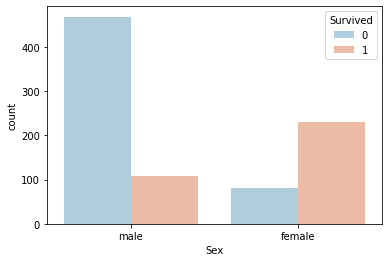

In [540]:
sns.countplot(x='Sex',hue='Survived',data=df,palette='RdBu_r')

Definitely true. It makes sense because men are protective of women, especially in survival situations. Let's go back to the name column for now.

In [541]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can build on the female concept. It makes sense that being Mrs would help a woman to survive because they have a husband to look out for them. Let's add a new binary class of a column, Mrs

In [542]:
def isMrs(x):
    if 'Mrs' in x:
        return 1
    else:
        return 0

df["Mrs"] = df['Name'].apply(isMrs)

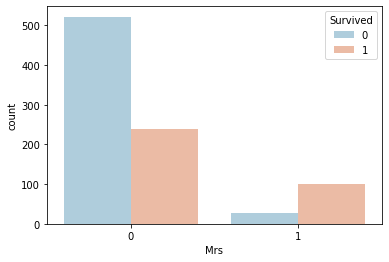

In [543]:
sns.countplot(x='Mrs',hue='Survived',data=df,palette='RdBu_r')

As expected there is a correlation of survival for being a wife. I did the same thing with a function called isDr and surprisingly this did not see correlation with survival. Let's finish up this section by creating dummy variables and dropping some of the other columns.

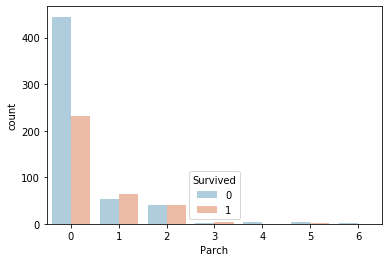

In [544]:
sns.countplot(x='Parch',hue='Survived',data=df,palette='RdBu_r') 

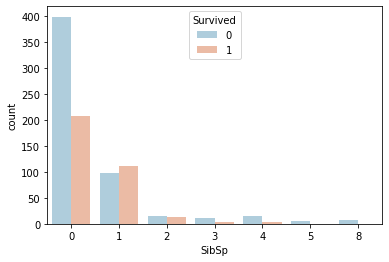

In [545]:
sns.countplot(x='SibSp',hue='Survived',data=df,palette='RdBu_r') 

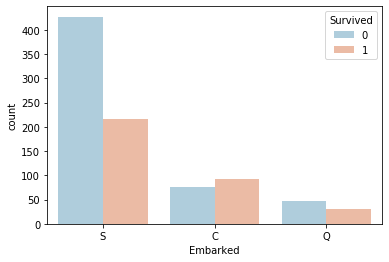

In [546]:
sns.countplot(x='Embarked',hue='Survived',data=df,palette='RdBu_r') 

We will keep the Parch, SibSp, and Embarked (and Sex) columns because they help to predict survival. As for the Name, Ticket, and PassengerId we will drop these because they can't or haven't been interpretted.

In [547]:
df.drop(columns=["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [548]:
df = pd.get_dummies(data=df,columns=["Parch","SibSp","Embarked","Sex"], drop_first=False) 

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Fare        889 non-null    float64
 4   Mrs         889 non-null    int64  
 5   Parch_0     889 non-null    uint8  
 6   Parch_1     889 non-null    uint8  
 7   Parch_2     889 non-null    uint8  
 8   Parch_3     889 non-null    uint8  
 9   Parch_4     889 non-null    uint8  
 10  Parch_5     889 non-null    uint8  
 11  Parch_6     889 non-null    uint8  
 12  SibSp_0     889 non-null    uint8  
 13  SibSp_1     889 non-null    uint8  
 14  SibSp_2     889 non-null    uint8  
 15  SibSp_3     889 non-null    uint8  
 16  SibSp_4     889 non-null    uint8  
 17  SibSp_5     889 non-null    uint8  
 18  SibSp_8     889 non-null    uint8  
 19  Embarked_C  889 non-null    u

### Machine Learning

In [550]:
from sklearn.model_selection import train_test_split

In [551]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=111)

In [552]:
from sklearn.linear_model import LogisticRegression

In [553]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\kolok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [554]:
from sklearn.metrics import classification_report

In [555]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       163
           1       0.81      0.75      0.78       104

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267



# Conclusion

Ultimately we have been able to achieve a test accuracy of 84%. There are some tweaks that could have been done to raise this. For instance, I ran the same model without saving the Parch column with dummy variables and saw the accuracy improve. I also saw an increase in accuracy by changing the random state during the train_test_split. More time could have been spent fine tuning the parameters, but this project regardlessly served as a good learning opportunity. We got practice methodically filling missing values. We preserved certain columns based on their apparent correlations using graphs. We even added a column Mrs. This Mrs column did in fact help our model (as I later verified a 1% increase in accuracy). We also might have tweaked the parameters within the Logistic Regression model definition and spent much more time overall on the data set. This concludes this project on Binary classification.